In [96]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix

In [97]:
df=pd.read_csv(r"c:\Users\user\Desktop\Kaggle Datasets\healthcare-dataset-stroke-data.csv")


In [98]:
df.head(2)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1


In [99]:
#Data info
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [100]:
#Data info 2
df.shape

(5110, 12)

In [101]:
#Data info 3
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [102]:
#Missing values
df.isnull().sum()
df.dropna(inplace=True)
df.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [103]:
#Handling Duplicated Values
df.duplicated().sum()
df.drop_duplicates(inplace=True)


In [104]:
df.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [105]:
#EDA
df.groupby("gender")["heart_disease"].sum().reset_index().sort_values("heart_disease", ascending=False).style.background_gradient(cmap="Oranges")

,gender,heart_disease
1,Male,143
0,Female,100
2,Other,0


In [106]:
df.groupby("gender")[["heart_disease","stroke","hypertension"]].sum().reset_index().sort_values("heart_disease",ascending=False).sort_values("stroke",ascending=False).sort_values("hypertension",ascending=False).style.background_gradient(cmap="Blues")

,gender,heart_disease,stroke,hypertension
0,Female,100,120,251
1,Male,143,89,200
2,Other,0,0,0


In [107]:
df.head(5)


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [108]:
df = df.drop(df[df["gender"] == "Other"].index) #Removing "other" From "gender" Column


In [109]:
Ratio=df.groupby("gender").size()
x=pd.DataFrame(Ratio)
x.style.background_gradient(cmap="Reds")

,0
gender,
Female,2897
Male,2011


In [110]:
df_sorted = df.groupby("gender")[["heart_disease","stroke","hypertension"]].sum().reset_index()
df_sorted = df_sorted.sort_values(["heart_disease", "stroke", "hypertension"], ascending=False)


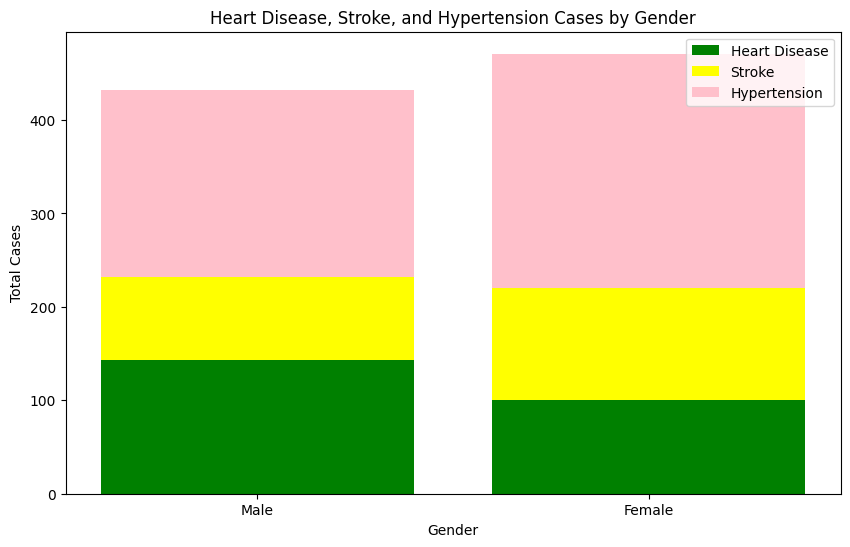

In [111]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Stacked bar plot
plt.bar(df_sorted["gender"], df_sorted["heart_disease"], label="Heart Disease", color="green")
plt.bar(df_sorted["gender"], df_sorted["stroke"], bottom=df_sorted["heart_disease"], label="Stroke", color="yellow")
plt.bar(df_sorted["gender"], df_sorted["hypertension"], bottom=df_sorted["heart_disease"] + df_sorted["stroke"], label="Hypertension", color="pink")

plt.xlabel("Gender")
plt.ylabel("Total Cases")
plt.title("Heart Disease, Stroke, and Hypertension Cases by Gender")
plt.legend()
plt.show()


In [112]:
# Binary encoding for ever_married
df['ever_married'] = df['ever_married'].map({'Yes': 1, 'No': 0})

# One-hot encoding for nominal categorical variables
categorical_cols = ['gender', 'work_type', 'Residence_type', 'smoking_status']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Define numerical features and scale them
numerical_cols = ['age', 'avg_glucose_level', 'bmi']
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Display first few rows to verify preprocessing
df.head()

,id,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,gender_Male,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,1.069938,0,1,1,2.777797,0.981145,1,True,False,True,False,False,True,True,False,False
2,31112,1.646336,0,1,1,0.014016,0.459086,1,True,False,True,False,False,False,False,True,False
3,60182,0.271847,0,0,1,1.484266,0.701016,1,False,False,True,False,False,True,False,False,True
4,1665,1.601998,1,0,1,1.549325,-0.623231,1,False,False,False,True,False,False,False,True,False
5,56669,1.690675,0,0,1,1.821493,0.013426,1,True,False,True,False,False,True,True,False,False


In [113]:
# Define features (X) and target (y)
X = df.drop('stroke', axis=1)
y = df['stroke']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Verify shapes
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (3926, 16)
Testing set shape: (982, 16)


In [114]:
# Initialize logistic regression model with balanced class weights
model = LogisticRegression(random_state=42, class_weight='balanced')

# Train the model
model.fit(X_train, y_train)

# Confirm model is trained
print("Model training completed.")

Model training completed.


C:\Users\user\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [115]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Display first few predictions
print("First 5 predictions:", y_pred[:5])


First 5 predictions: [0 1 0 0 0]


In [116]:
# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[691 249]
 [ 11  31]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.74      0.84       940
           1       0.11      0.74      0.19        42

    accuracy                           0.74       982
   macro avg       0.55      0.74      0.52       982
weighted avg       0.95      0.74      0.81       982



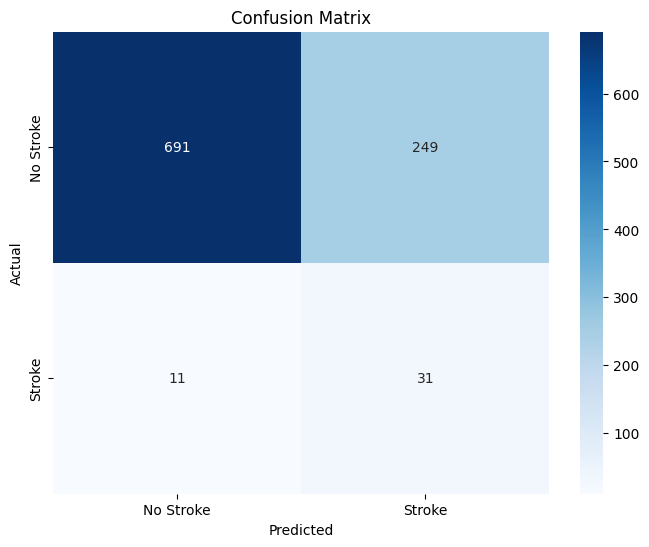

In [117]:
# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Stroke', 'Stroke'], yticklabels=['No Stroke', 'Stroke'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()